<a href="https://colab.research.google.com/github/YuliiaMan/python_for_ds_tasks/blob/main/hw_4_4_%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B7_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи pandas.DataFrame. Це дозволяє будувати візуалізації ще швидше.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot` та `pandas`.  Завантажте дані з файла yulu_rental.csv у pandas.DataFrame df.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_path = '/content/drive/MyDrive/data/yulu_rental.csv'
df = pd.read_csv(data_path)

1.1. Користуючись групою методів `pandas.plot` побудуйте гістограму кількості зареєстрованих користувачів з налаштуваннями за замовченням (тобто без жодних додаткових параметрів).

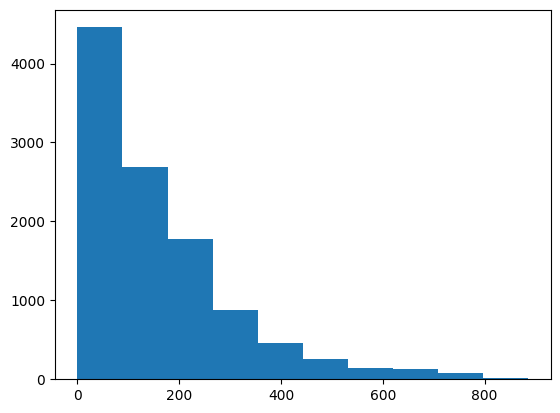

In [6]:
plt.hist(df.registered);

1.2. Побудуйте гістограму для цього ж показника, але задайте кількість бінів рівну 30 і задайте прозорість 0.5. Додайте підписи за осями ОХ і ОУ, а також назву дівграмі. Опишіть свої спостереження. Що бачите? Чому дані можуть мати такий розподіл?

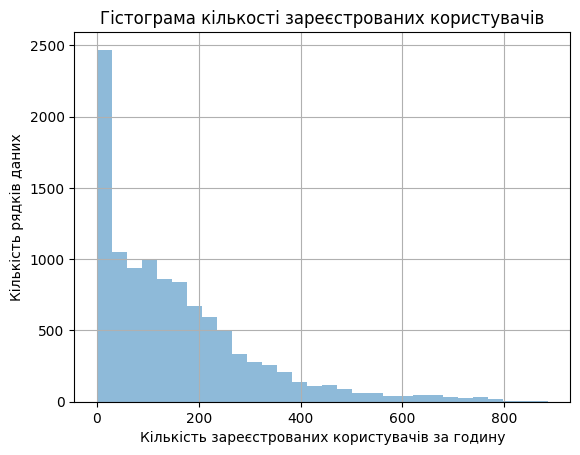

In [8]:
plt.hist(df.registered, bins=30, alpha=.5);
plt.title('Гістограма кількості зареєстрованих користувачів')
plt.xlabel('Кількість зареєстрованих користувачів за годину')
plt.ylabel('Кількість рядків даних')
plt.grid(True)

На графіку можна побачити пік на проміжку від 0 до 30 - це може вказувати на періоди з високим трафіком (час пік). Потім активність користувачів зменшилась на проміжку від 10 до 250, але вона була активна більш тривалий час. Більша частина користувачів має низьку активність. Такі коливання користувачів можуть бути обумовлені проміжком часу (день чи ніч), погодними умовами, сезоністю.

Має вийти щось таке (може бути без сітки):

![](https://drive.google.com/uc?export=view&id=1Pb3UD8cmg_V0LLf8A4feOepTDXMqEAf8)


--------

Перетворимо колонку `datetime` на тип даних `pd.datetime` - це нам доопоможе в подальшій роботі. Просто запустіть колонку нижче і занатуйте собі цей метод роботи з колонкою, в якій міститься дата і час.

In [9]:
df['datetime'] = pd.to_datetime(df.datetime)

І створимо нову колонку `dayofweek` для того, аби дослідити детальніше, коли у нас немає поїздок.

In [10]:
df['dayofweek'] = df.datetime.dt.day_of_week

Переглянемо значення в колонкці. Колонка dayofweek містить числа від 0 до 6 включно, де 0 відповідає понеділку.

In [11]:
df[['datetime','dayofweek']][df.dayofweek==0].head()

,datetime,dayofweek
47,2011-01-03 00:00:00,0
48,2011-01-03 01:00:00,0
49,2011-01-03 04:00:00,0
50,2011-01-03 05:00:00,0
51,2011-01-03 06:00:00,0


2. Проведемо аналіз нульової активності зареєстрованих користувачів за днями тижня. Для цього
  1. Виберіть з набору даних усі записи, де кількість зареєстрованих користувачів дорівнює 0. Групуйте ці записи за днями тижня (`dayofweek`) та обчисліть кількість нульових записів для кожного дня.
  2. Після групування, використайте графік типу "bar" для візуалізації результатів. Кожна смужка на графіку має відображати кількість записів у даних для цього дня тижня, коли не було зареєстровано жодної поїздки користувачами.

In [13]:
zero_registered = df[df['registered'] == 0]
zero_registered_by_day = zero_registered.groupby('dayofweek').size()

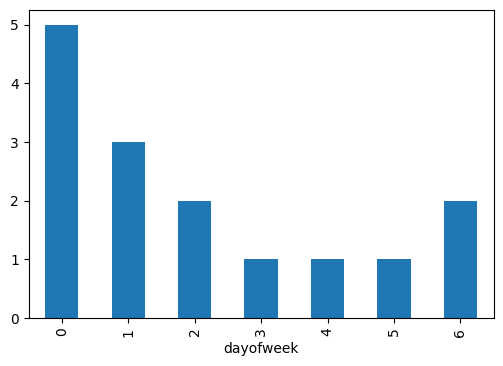

In [19]:
zero_registered_by_day.plot.bar(figsize=(6,4));

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1FXNzMa7rTdBQDwXSQfPTtPX5CHZK9A4X)

3. Проведемо аналіз загальної кількості зареєстрованих покристувачів за різними погодними умовами.
Згрупуйте всі дані за погодними умовами і визначте суму кількості зареєстрованих користувачів для кожної погодньої умови.
Побудуйте стовпачасту діаграму, які відобразить результат обчислень.
Зверніться до опису даних та дайте відповідь: чи побудована візуалізація має логічний сенс з точки зору опису даних.

In [32]:
df_registered_by_weather = df.groupby('weather')['registered'].sum()
df_registered_by_weather


,registered
weather,
1,1186163
2,419914
3,87106
4,158


Text(0, 0.5, 'Кількість зареєстрованих користувачів')

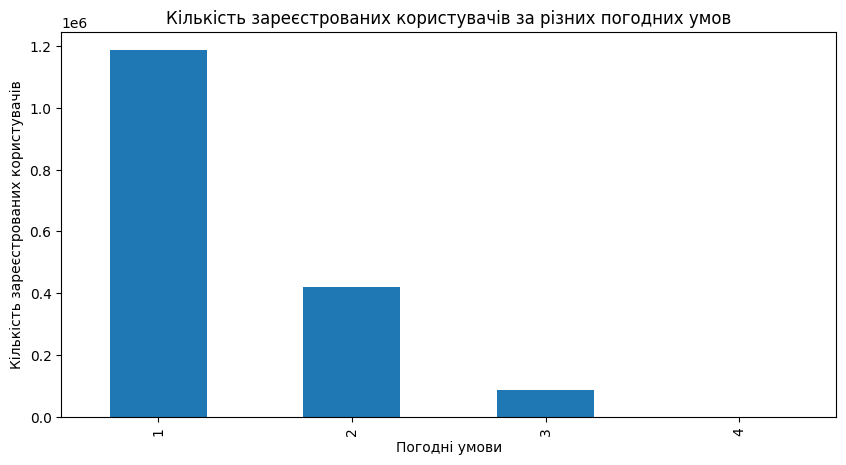

In [33]:
df_registered_by_weather.plot.bar(figsize =(10, 5));
plt.title('Кількість зареєстрованих користувачів за різних погодних умов')
plt.xlabel('Погодні умови')
plt.ylabel('Кількість зареєстрованих користувачів')


Погодні мови "Ясно, мало хмарно" мають найвищу кількість зареєстрованих користувачів, оскільки гарна погода сприяє оренді велосипедів.
Погодні умови "Сильний дощ, сніг" мають найнижчий показник через перешкоди для велосипедистів.
Графік і дані мають логічний сенс, адже погода є ключовим фактором у використанні велосипедів. Люди уникають велосипедних поїздок у складних погодних умовах, що чітко відображається у даних.

4. Користуючись групою методів pandas.plot побудуйте діаграму розсіювання (scatter plot) між вологістю і кількістю зареєстрованих користувачів. Встановіть прозорість на 0.5, а також налаштуйте діаграму так, аби колір кожної точки відповідав значенню температури за відчуттями (`atemp`).

Проаналізуйте графік, що спостерігаєте?

In [34]:
df['atemp'] = df.atemp

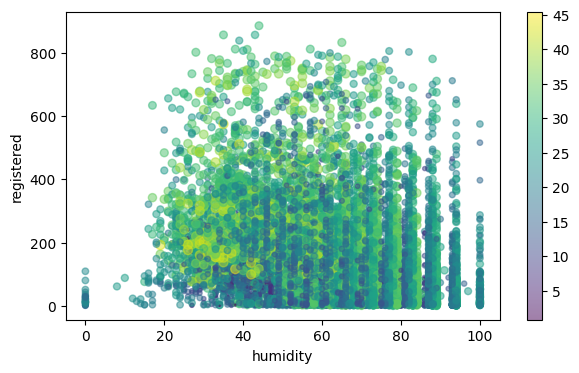

In [41]:
col_x = 'humidity'
col_y = 'registered'
color_feature = 'atemp'

plt.figure(figsize=(7,4))
plt.scatter(df[col_x], df[col_y], alpha=0.5,
            s=1*df[color_feature], c = df.atemp)
plt.xlabel(col_x)
plt.ylabel(col_y)
plt.colorbar();


Точки згруповані щільно на середні рівня вологості та комфортних температур, це може свідчити про найпопулярніші погодні умови для поїздок.
При більш високих або низьких температурах та рівнях вологості активність користувачів зменшується.

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1trepX8z23YwyP9P8cAko9IzwOZkvLo8y)